# 假设检验
by Maxwell Margenot and Delaney Granizo-Mackenzie. Review by Gilbert Wasserman.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



统计推断是一种基于小样本对大群体进行预测的实践，传统上分为两个部分:**估计**和**假设检验**。评估提供了您可能感兴趣的特定事物的值，例如平均值或方差，并提供了一个置信区间。置信区间提供了一个区域，在这个区域内，您可以期望找到您所估计的参数的真实值，因为估计几乎永远不会是精确的。置信区间使用一个设定的置信水平来选择区间应该有多宽，为了实现更高的置信，我们必须报告一个更宽的区间。欲了解更多信息，请参见quantlecture系列中的[置信区间讲座](https://www.quantopian.com/lectures/confidence-intervals)。

例如，我们可以将样本均值估计为$100$，置信区间为[$90,110$],置信水平为$95\%$。这并不意味着真实的总体均值有$95\%$的概率在$90$和$110$之间，因为真实的均值是一个固定的值，而概率是$100\%$或$0\%$，但是我们不知道是哪一个。相反，这意味着在假定分布的基本假设成立的情况下，对$95\%$置信区间的多次计算中，总体均值的$95\%$的计算结果将落在区间内。

这给了我们一个总体可能表现出的特定特征的概念，给了一个样本。假设检验提供了一个不同的焦点，为假设值的统计检验提供了一个详细的框架。通过断言一个值应该是什么，您创建了一个可测试的假设。

需要记住的一点是，统计测试是这样设计的:如果所有的先决条件都为真，那么在一定的时间内，您应该能够得到关于数据的正确答案。当你在测试的基础上接受一个假设为真，这并不意味着它一定是真的。这只是意味着你可以知道你错的概率。

## 零假设和备择假设

我们首先要介绍的是零假设，通常写成$H_0$。零假设是默认的情况，通常反映了当前世界的普遍概念。备择假设是你要验证的。

### 例子

备择假设是你有10双以上的鞋。
零假设$H_0$表示你拥有的鞋子不超过10双。

备择假设是吃披萨与肥胖有关。
零假设$H_0$表示它不是。

备择假设$H_A$是微软的平均回报率> 0。
零假设$H_0$是它们<= 0。

### 测试的困难

有些假设比其他的更容易验证。例如，“我有10双以上的鞋”和“你没有”的零假设很容易通过计算你拥有的鞋的数量来验证。然而，在这种情况下，你仍然不能得到一个完美的答案，因为在计数中可能会有测量误差，albiet相当小。

另一方面，“昆虫物种的数量大于宇宙中恒星的数量”这一假设将更难验证，需要大量的数据收集。

### 假设必须是可验证的

一个假设不能是模糊的，否则如何检验它。例如，“动量交易是一种赚钱的好方法。”“好”是什么意思?我们讨论的是哪种动量交易?假设应该是非常具体的，所需要的测试类型应该很快从假设中得出。

## 如何进行假设检验

假设检验的主要步骤如下:

1. 陈述假设和假设的备择方案
2. 确定适当的测试统计量及其分布。确保满足关于数据的任何假设(平稳性、正态性等)
3. 指定显著性级别$\alpha$
4. 从$\alpha$和分布计算“临界值”。
5. 收集数据并计算测试统计量
6. 比较检验统计量与临界值，决定是否接受或拒绝假设。

首先，我们陈述我们想要验证的假设。我们通过识别一个**零假设**和一个**备择假设**来做到这一点。零假设，$H_0$，是我们要检验的，而备择假设，$H_A$，是在拒绝$H_0$的情况下被接受的假设。

假设我们想要测试微软股票的平均回报是否为正。我们测试的参数用$\theta$表示，参数的原假设值用$\theta_0$表示，在本例中它等于$0$。所以我们说，我们的$H_0$是$\theta = \theta_0$，回报率是负数时，则我们的$H_A$是$\theta \neq \theta_0$。包括这种形式，有三种可能的方式来形成无效假设和替代假设:

1. $H_0: \theta = \theta_0$ vs $H_A: \theta \neq \theta_0$(“不等于”替代假设)
2. $H_0: \theta \leq \theta_0$ vs $H_A: \theta > \theta_0$(“大于”替代假设)
3. $H_0: \theta \geq \theta_0$ vs $H_A: \theta < \theta_0$(“小于”替代假设)

在本例中，我们测试MSFT的收益，$\theta = \mu_{MSFT}$，表示股票的平均收益。因为我们正在测试回报率是正还是负，所以我们有$\theta_0 = 0$。我们的例子遵循假设检验的第一个公式。这是一个**双侧假设检验**(或**双尾假设检验**)。第二个和第三个公式是**单边假设检验**(或**单尾假设检验**)的例子。在单边测试中，只有当数据的$\theta$分别大于或小于$\theta_0$时，我们才拒绝原假设，而选择备择假设。如果数据表明$\theta$大于或小于$\theta_0$，则双边测试将拒绝原假设，以支持备择。

因此，如果我们要从更定性的角度写出我们对MSFT的假设，我们会得到:

\begin{eqnarray}
H_0 &:& \text{微软股票的平均回报率是$0$}\\
H_A &:& \text{微软股票的平均回报率不是$0$}
\end{eqnarray}
在形成假设检验时，原假设和备择假设必须互为补充。它们之间必须包含$\theta$的所有值。不管我们执行的假设检验的类型是什么，我们总是像检验$\theta = \theta_0$那样检验原假设。在任何一个单侧检验的情况下，这仍将为我们提供足够的证据来做出决定。例如，如果$H_0: \theta \leq 0$， $H_A: \theta > $，并且我们有足够的证据来拒绝$H_0: \theta = 0$而支持$H_A: \theta > 0$，那么对于所有小于$0$的值也是成立的。

最常见的假设检验类型是双尾检验，即“不等于”假设检验，因为它提供了一个中立的观点。与“不等于”测试相比，单尾假设测试不那么中立，这反映了测试者的想法。单侧测试通常用于测试“期望的”结果，或者测试人员预先知道的结果。


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

我们来获取一些数据。

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


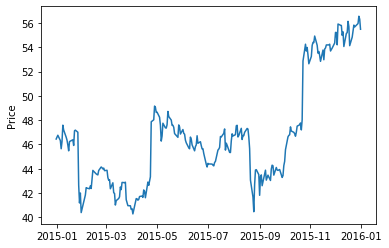

In [2]:
from pandas_datareader import data
start = "2015-01-01"
end = "2016-01-01"
pricing_sample = data.get_data_yahoo("MSFT",  start,  end)['Close']

#transform it into returns
returns_sample = pricing_sample.pct_change()[1:]

# plot it
plt.plot(pricing_sample)
plt.ylabel('Price');

接下来，回报率。

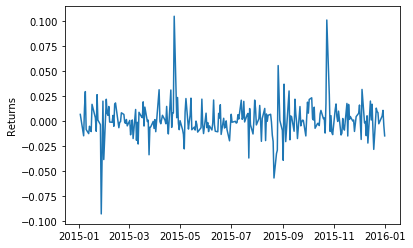

In [3]:
plt.plot(returns_sample)
plt.ylabel('Returns');

## 为什么这一切都是必要的?

为什么我们不能取微软的平均回报并检查它们是否为>0?因为我们不能看到回报背后的实际数据生成过程，我们只能在有限的时间段内对回报进行抽样。因为我们只观察一个样本，这个样本可能反映也可能不反映底层过程的真实状态。由于这种不确定性，我们需要使用统计检验。

接下来，我们确定适当的**检验统计量**及其概率分布。测试统计数据通常采用以下形式:

$$ \text{检验统计量} = \frac{\text{样本统计量} - \text{$H_0$下的总体参数的值 ($\theta_0$)}}{\text{样本统计量的标准误差}} $$

检验统计量是根据样本数据计算出来的，并与样本数据的概率分布进行比较，以决定是否拒绝原假设。由于我们正在测试MSFT股票的平均回报，我们可以使用样本均值$\bar{X}_\mu$作为我们的样本统计量。如果我们知道标准差$\sigma$，则将样本均值的标准误差计算为$\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$,或者$s_{\bar{X}} = \frac{s}{\sqrt{n}}$，其中$s$为样本标准差。因此，使用这些定义，我们的测试统计量可以计算为:

$$ \frac{\bar{X}_\mu - \theta_0}{s_{\bar{X}}} = \frac{\bar{X}_\mu - 0}{s/\sqrt{n}} $$

四种最常见的测试统计分布如下:

* $t$-分布($t$-检验)
* 标准正态分布($z$-检验)
* 卡方($\chi^2$)分布($\chi^2$-检验)
* $F$-分布($F$-检验)

稍后我们将详细介绍它们。现在，我们将在MSFT的例子中使用$z$-检验来检验我们的假设。


在确定适当的测试统计信息和概率分布之后，我们需要指定测试的**显著性水平**，即$\alpha$。为了拒绝或拒绝而将测试统计数据与之进行比较的值
$H_0$是根据我们的$\alpha$值确定的。

|| 真实情况 ||
| :---: | :---: | :---: |
| **决定** | $H_0$ 为真 | $H_0$ 为假 |
| 不拒绝 $H_0$ | 正确决定 | 第二类错误 |
| 拒绝 $H_0$ (接受 $H_A$) | 第一类错误 | 正确决定 |

我们的显著性水平等于发生I型错误(“假阳性”)的概率。发生第二类错误(“假阴性”)的概率用$\beta$表示。如果我们试图减少第一类错误发生的概率，我们就增加了第二类错误发生的概率，从而导致折衷。减少第一类和第二类错误同时发生的概率的唯一方法是增加样本量。

传统的显著性水平分别为$0.1$、$0.05$和$0.01$。在$0.1$拒绝零值意味着我们有一些证据原假设是假的，$0.05$意味着我们有强有力的证据原假设是假的，在$0.01$拒绝我们有非常强有力的证据原假设是假的。

### 临界值

现在我们算出了临界值，或者，拒绝点。我们的测试统计量的临界值是我们在决定是否拒绝原假设时对测试统计量进行比较的值。如果我们拒绝原假设，我们说结果是**统计显著**，而如果我们不拒绝原假设，我们说结果是**没有统计显著**。

我们将检验统计量与一个**临界值**进行比较，以决定是否拒绝原假设。检验的临界值是根据我们的假设检验的$\alpha$和选择的分布来确定的。在我们的例子中，假设$\alpha = 0.05$，那么我们的显著性水平是$0.05$。对于单边$z$-检验，有两种不同的方法来查看临界值:

* 如果我们测试$H_0$: $\theta \leq \theta_0$，$H_A$: $\theta > \theta_0$当$\alpha = 0.05$时，我们的临界值是$z_{0.05} = 1.645$。因此，我们比较我们的检验统计量，如果$z > 1.645$我们拒绝零假设。
* 如果我们测试$H_0$: $\theta \geq \theta_0$, $H_A$: $\theta < \theta_0$当$\alpha = 0.05$时，我们的临界值是$-z_{0.05} = -1.645$。因此，我们比较我们的检验统计量，如果$z < -1.645$，我们就拒绝原假设。

双边测试是一个稍微不同的情况。因为它是双面的，所以有两个拒绝点，负的和正的。我们的$\alpha$是$0.05$，所以类型I错误的总概率总和必须是$0.05$。因此，我们将$0.05$对半分割，使我们的两个拒绝点分别为正临界值$z_{0.025}$和负临界值$-z_{0.025}$。对于$z$-测试，这些值是$1.96$和$-1.96$。因此，如果$z < -1.96$或$z > 1.96$，则拒绝原假设。如果我们发现$-1.96 \leq z \leq 1.96$，则不能拒绝原假设。

在进行假设检验时，您还可以使用**$p$-value**来确定结果。$p$-值是可以拒绝零假设的最小显著性水平。人们常常把$p$-值解释为“零假设为假的概率”，但这是一种误导。$p$-值只在与显著性值比较时才有意义。如果$p$-值小于$\alpha$，则拒绝原假设，否则不拒绝。较低的$p$值并不会使某些东西“在统计上更有意义”。许多统计输出将为您计算一个$p$-值，但是也可以手动计算它。计算取决于你的假设检验类型和你正在处理的分布的CDF(包括在[随机变量讲座](https://www.quantopian.com/lectures/random-variables))。要手动计算$p$-值，请执行以下操作:

* 在“小于或等于”假设检验中，$p$-值为$1 - CDF(\text{检验统计量})$
* 在“大于或等于”假设检验中，$p$-值为$CDF(\text{检验统计量})$
* 在“不等于”假设检验中，$p$-值为$2 * (1 - CDF(|\text{检验统计量}|))$

显著性值与置信区间非常好地结合在一起，在我们的[置信区间讲座](https://www.quantopian.com/lectures/confidence-intervals)中有更深入的介绍。置信区间为我们提供了一个给定显著性水平的参数可能取值范围的估计值。例如，如果MSFT回报的平均值的$99\%$置信区间是$(-0.0020,0.0023)$，那就意味着有$99\%$的机会使平均值的真实值在这个区间内。

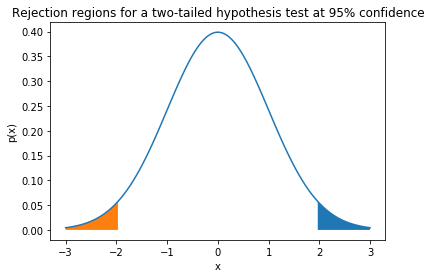

In [4]:
# Plot a standard normal distribution and mark the critical regions with shading
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, where = x > 1.96)
ax.fill_between(x, 0, y, where = x < -1.96)
plt.title('Rejection regions for a two-tailed hypothesis test at 95% confidence')
plt.xlabel('x')
plt.ylabel('p(x)');

现在我们为我们的测试收集相关的数据，并为一个双向的$5\%$显著性测试计算测试统计量。请记住，数据的任何负面特征都将对我们的假设检验产生负面影响，并可能使其无效。在我们对MSFT返回值的测试中，我们可能会遇到时间段偏差或前瞻性偏差的问题(如果我们没有正确地准备测试)。与历史数据一样，我们使用的数据可能会导致一个特定的测试结果，而这个测试结果可能在未来并不适用。我们还必须确保数据不包含我们在测试期间不知道的任何值(尽管在将多个事物与假设测试进行比较时，这是一个更大的问题)。

这里我们计算测试统计量:

In [5]:
n = len(returns_sample)
test_statistic = ((returns_sample.mean() - 0) /
                (returns_sample.std()/np.sqrt(n)))
print('t test statistic: ', test_statistic) 

t test statistic:  0.7684178060885201


为了对测试进行统计决策，我们将测试统计量与临界值进行比较。如上所述，我们的测试统计值位于95%双尾$z$-检验的两个临界值之间，因此在本例中，我们**未能拒绝**我们的$H_0$，我们的假设是MSFT的回报是**是** $0$。

如果我们选择用$p$-value来确定这个假设检验的结果，我们将按照以下方式来计算$p$-value:

In [6]:
from scipy.stats import t

In [7]:
p_val = 2 * (1 - t.cdf(test_statistic, n - 1))
print( 'P-value is: ', p_val)

P-value is:  0.44296137042708295


由于$p$-值小于我们的显著性水平$\alpha = 0.05$，我们**未能拒绝**原假设。

在我们做出统计决定之后，我们必须把它转化为现实生活。通常情况下，这可能很难直接采取行动，但结果可能有其他含义。在我们的例子中，我们发现微软2015年的日收益与$0$没有显著差异。

## 均值假设检验

$z$-分布，或标准正态分布，是金融中一个重要的概率分布。我们喜欢正态分布因为它包含了很多有用的性质。最重要的是，许多基本的方法需要一个正常的假设才能进行。然而，在大多数情况下，$z$-分布对于我们的数据是不合适的。我们很少知道数据的真实参数值(平均值和方差)，必须依赖于近似值。在这些情况下，我们应该使用$t$-分布，以及正态分布的近似值。当涉及到小样本规模时，$t$-分布更宽容，它意味着与样本均值和方差一起使用。它有更肥的尾巴和更低的峰值，与正态分布相比具有更大的灵活性。

$t$和$z$的分布都依赖于一个基本的常态假设，这是我们分析财务数据时的典型情况。因此，除了测试个别平均值之外，使用它们来比较两个或多个平均值也是有意义的。我们可以使用假设检验来确定几个数据集的平均值是否在统计上彼此不同。在这里，我们将使用$t$-分布来演示。我们将用假设检验来比较标准普尔500指数和苹果公司股票的平均回报，看看这些差异是否具有统计学意义。

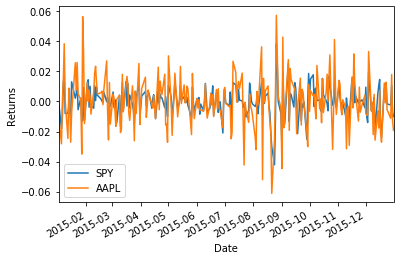

In [8]:
symbol_list = ["SPY", "AAPL"]
start = '2015-01-01'
end = '2016-01-01'
pricing_sample = data.get_data_yahoo(symbol_list,start, end)['Close']
pricing_sample.columns = ["SPY", "AAPL"]
returns_sample = pricing_sample.pct_change()[1:]
returns_sample.plot()
plt.ylabel('Returns');

虽然这些回报看起来有相同的均值，我们仍然没有足够的证据来确定。我们用假设检验来建立我们在统计基础上的怀疑。

在比较两种均值时，我们的假设检验如下:

1. $H_0: \mu_1 - \mu_2 = \theta_0, \ H_A: \mu_1 - \mu_2 \neq \theta_0$
2. $H_0: \mu_1 - \mu_2 \leq \theta_0, \ H_A: \mu_1 - \mu_2 > \theta_0$
3. $H_0: \mu_1 - \mu_2 \geq \theta_0, \ H_A: \mu_1 - \mu_2 < \theta_0$

其中$\mu_1, \mu_2$分别是SPY和AAPL的平均值，$\theta_0$是我们要测试的参数。我们将使用第一个假设检验来检验两个收益是否相等。如果我们假设总体方差相等，我们的检验统计量计算如下:

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}}$$

有$s_p^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2)}{n_1 + n_2 - 2}$作为协方差的估计量，称为合并方差，$n_1 + n_2 - 2$作为自由度的数目($n_1 - 1$和$n_2 - 1$对于每个数据集)。一个典型的均数检验假设所有相关的方差都与正态分布相等。如果我们假设方差不相等，我们必须以不同的方式计算测试统计量。我们在这种情况下的测试统计数据是:

$$ t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}} = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}}$$

其中，用于查找临界统计量的自由度是修改后的自由度，可以自由变化的值的数量为$df = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{\frac{(s_1^2/n_1)^2}{n_1} + \frac{(s_2^2/n_2)^2}{n_2}}$。这保留了被测试数据的基本常态，同时考虑了不同的方差。以这种方式计算统计数据可以消除很多在方差不相等时可能出现的问题，特别是在基础数据的样本量也不同的情况下。这个$t$-test的特殊情况被称为[“Welch的不等方差$t$-检验”](https://en.wikipedia.org/wiki/Welch%27s_t-test)。

对于这个例子，我们假设差异间谍和苹果回报是不同的。我们认为苹果将比SPY风险更大，所以我们将使用第二个公式的测试统计。假设$\alpha = 0.05$我们计算的是$95\%$假设检验。

In [9]:
# Sample mean values
mu_spy, mu_aapl = returns_sample.mean()
s_spy, s_aapl = returns_sample.std()
n_spy = len(returns_sample['SPY'])
n_aapl = len(returns_sample['AAPL'])

test_statistic = ((mu_spy - mu_aapl) - 0)/((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**0.5
df = ((s_spy**2/n_spy) + (s_aapl**2/n_aapl))**2/(((s_spy**2 / n_spy)**2 /n_spy)+((s_aapl**2 / n_aapl)**2/n_aapl))

print('t test statistic: ', test_statistic) 
print('Degrees of freedom (modified): ', df) 

t test statistic:  0.0511629395423468
Degrees of freedom (modified):  405.394250713334


查看一个[t-table](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values)，我们确定双侧假设测试的临界值为$-1.96$和$1.96$。我们的测试统计是在这些值之间，所以我们**未能拒绝**原假设，并确定SPY和苹果两者的回报率的差异与$0$是**没有**明显不同的。

## 方差的假设检验

如果我们想要测试总体的方差，我们需要使用不同于$t$和$z$分布的分布。根据定义，方差必须大于(或等于)$0$，而且到目前为止我们使用的允许负值的分布使它们不能作为测试分布。风险是用标准差和方差来量化的，所以这种假设检验方法是我们金融工具箱里的一个方便的补充。

我们将不再使用$t$和$z$-分布，而是使用$\chi^2$分布进行单方差测试，使用$F$分布进行方差比较。这些分布在以$0$为下界，使它们能够以这种方式进行测试。

就像我们所有其他的假设检验一样，单个方差的检验可以有三种形式:

1. $H_0: \sigma^2 = \sigma_0^2, \ H_A: \sigma^2 \neq \sigma_0^2$
2. $H_0: \sigma^2 \leq \sigma_0^2, \ H_A: \sigma^2 > \sigma_0^2$
3. $H_0: \sigma^2 \geq \sigma_0^2, \ H_A: \sigma^2 < \sigma_0^2$

$\chi^2$分布是一个函数族，每个不同的公式由自由度决定。对于每个不同的自由度值$k$，分布的形状是不同的。

In [10]:
from scipy.stats import chi2

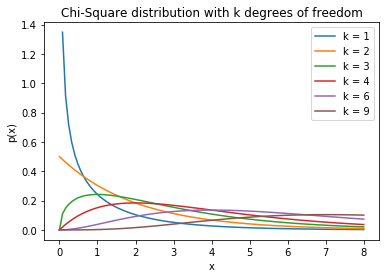

In [11]:
# Here we show what a chi-square looks like
x = np.linspace(0, 8, 100)
y_1 = chi2.pdf(x, 1)
y_2 = chi2.pdf(x, 2)
y_3 = chi2.pdf(x, 3)
y_4 = chi2.pdf(x, 4)
y_6 = chi2.pdf(x, 6)
y_9 = chi2.pdf(x, 9)

fig, ax = plt.subplots()
ax.plot(x, y_1, label = 'k = 1')
ax.plot(x, y_2, label = 'k = 2')
ax.plot(x, y_3, label = 'k = 3')
ax.plot(x, y_4, label = 'k = 4')
ax.plot(x, y_6, label = 'k = 6')
ax.plot(x, y_9, label = 'k = 9')
ax.legend()
plt.title('Chi-Square distribution with k degrees of freedom')
plt.xlabel('x')
plt.ylabel('p(x)');

我们计算$\chi^2$ 检验统计量如下:

$$ \chi^2 = \frac{(n - 1)s^2}{\sigma_0^2} $$

其中$s^2$是样本方差，$n$是数据集的大小。自由度的数目是$n - 1$，它与测试统计量一起使用，以确定$\chi^2$假设测试的临界值。

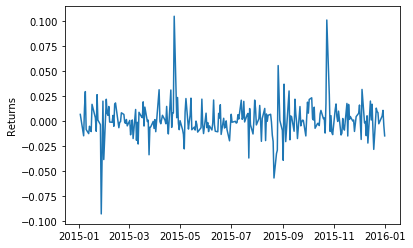

In [12]:
start = "2015-01-01"
end = "2016-01-01"
pricing_sample = data.get_data_yahoo('MSFT',start, end)['Close']
returns_sample = pricing_sample.pct_change()[1:]
plt.plot(returns_sample)
plt.ylabel('Returns');

现在我们将使用$\chi^2$-检验来测试微软股票的方差值。假设我们想要使用$\alpha = 0.01$来测试MSFT的方差是否小于或等于$0.0001$(即标准偏差或风险小于或等于$0.01$)。

$$ H_0: \sigma^2 \leq 0.0001, \ H_A: \sigma^2 > 0.0001 $$

现在我们计算我们的检验统计量:

In [13]:
test_statistic = (len(returns_sample) - 1) * returns_sample.std()**2 / 0.0001
print( 'Chi-square test statistic: ', test_statistic)

Chi-square test statistic:  795.3282594858912


In [14]:
# Here we calculate the critical value directly because our df is too high for most chisquare tables
crit_value = chi2.ppf(0.99, len(returns_sample) - 1)
print( 'Critical value at a = 0.01 with 251 df: ', crit_value)

Critical value at a = 0.01 with 251 df:  306.0435340069461


因为我们使用的是“小于等于”的单边假设检验公式，所以如果检验统计量大于临界值，我们就拒绝原假设。由于$795.328 > 306.04$，我们**拒绝**原假设，主张$\sigma^2 > 0.0001$。

### 比较两个方差

我们可以用$F$分布来比较两个不同事物的方差。当构建一个比较时
使用$F$-检验，假设公式是(如果你不想向上滚动):

1. $H_0: \sigma_1^2 = \sigma_2^2, \ H_A: \sigma_1^2 \neq \sigma_2^2$
2. $H_0: \sigma_1^2 \leq \sigma_2^2, \ H_A: \sigma_1^2 > \sigma_2^2$
3. $H_0: \sigma_1^2 \geq \sigma_2^2, \ H_A: \sigma_1^2 < \sigma_2^2$

$F$分布类似于$\chi^2$分布，因为它是不对称的，并且下界为$0$。$F$分布由两个不同的自由度值定义。为了假设检验的目的，每一个都与我们正在比较的一个因素相关。一个$F$分布可以由两个独立的$\chi^2$分布构造。$X$是一个$F$随机变量，如果它可以被写成$X = \frac{Y_1/d_1}{Y_2/d_2}$，其中$Y_1$和$Y_2$分别是自由度为$d_1$和$d_2$的$ chi^2$随机变量。

an $F$随机变量本质上是方差的比率。因此，构造$F$ test统计量的方法是取我们要测试的数据的样本方差之比。我们可以简单地选择$\sigma_1^2$和$\sigma_2^2$来表示我们要比较的方差，以便我们的f统计量大于$1$。 

$$ F = \frac{s_1^2}{s_2^2} $$

让我们比较SPY和苹果看看他们的差异是否相同(“不等于”假设测试)。我们将使用$\alpha = 0.05$ 检验。回想一下，对于双边测试，我们使用$\alpha/2$的值来计算下临界值和上临界值。我们收集数据并计算测试统计量。

In [15]:
symbol_list = ["SPY", "AAPL"]
start = "2015-01-01"
end = "2016-01-01"
pricing_sample = data.get_data_yahoo(symbol_list,start, end)['Close']
pricing_sample.columns =["SPY", "AAPL"]
returns_sample = pricing_sample.pct_change()[1:]

In [16]:
# Take returns from above, AAPL and SPY, and compare their variances
spy_std_dev, aapl_std_dev = returns_sample.std()
print('SPY standard deviation is: ', spy_std_dev) 
print ('AAPL standard deviation is: ', aapl_std_dev)

SPY standard deviation is:  0.00981136932482032
AAPL standard deviation is:  0.01684082298124088


注意，苹果的标准差大于SPY的标准差。因此，我们选择$\sigma_1^2$表示苹果的方差，$\sigma_2^2$表示SPY的方差。

In [17]:
test_statistic = (aapl_std_dev / spy_std_dev)**2
print("F Test statistic: ", test_statistic) 

F Test statistic:  2.9462349280870113


In [18]:
# Since these values are taken over the same time period, they will have the same number of degrees of freedom
df1 = len(returns_sample['AAPL']) - 1
df2 = len(returns_sample['SPY']) - 1

print('Degrees of freedom for SPY: ', df2) 
print ('Degrees of freedom for AAPL: ', df1)

Degrees of freedom for SPY:  251
Degrees of freedom for AAPL:  251


In [19]:
from scipy.stats import f

In [20]:
upper_crit_value = f.ppf(0.975, df1, df2)
lower_crit_value = f.ppf(0.025, df1, df2)
print('Upper critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), upper_crit_value) 
print ('Lower critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), lower_crit_value)

Upper critical value at a = 0.05 with df1 = 251 and df2 = 251:  1.2814426686003928
Lower critical value at a = 0.05 with df1 = 251 and df2 = 251:  0.7803704562859705


我们看到，我们的F统计值大于我们的F检验的上临界值。因此，我们**拒绝**原假设并支持备择假设，并得出结论，苹果和SPY的方差确实不同。

## 其他资源
这里介绍的一些内容改编自DeFusco、mey、Pinto和Runkle的《定量投资分析》。

更多常见的测试统计和测试可以查看[这里](https://en.wikipedia.org/wiki/statistical_is_is_testing #Common_test_statistics)。